In [ ]:
import pandas as pd


from google.colab import drive
drive.mount('/content/drive')

# Define the CSV file path in Google Drive
csv_file_path = '/content/drive/My Drive/Original data.csv'
# Define the chunk size and the CSV file path
chunksize = 1000  # Adjust the chunk size as needed


# Initialize an empty list to store the chunks
chunks = []

# Read the CSV file in chunks and skip bad lines
for chunk in pd.read_csv(csv_file_path, chunksize=chunksize, on_bad_lines='skip'):
    chunks.append(chunk)

# Concatenate all chunks into a single DataFrame
data = pd.concat(chunks, ignore_index=True)

# Replace 'Crash severity' with the actual column name in your dataset
crash_severity_column = 'Crash severity'

# Calculating counts and percentages
severity_counts = data[crash_severity_column].value_counts()
severity_percentages = data[crash_severity_column].value_counts(normalize=True) * 100

# Ensuring the column order for percentages
severity_order = ['Non-Injury Crash', 'Minor Crash', 'Serious Crash', 'Fatal Crash']
severity_counts_ordered = severity_counts.reindex(severity_order)
severity_percentages_ordered = severity_percentages.reindex(severity_order)

# Creating the table by merging counts and percentages
table_4 = pd.concat([severity_counts_ordered, severity_percentages_ordered], axis=1)
table_4.columns = ['Total Count', 'Percentage %']
table_4 = table_4.reset_index().rename(columns={'index': 'Crash Severity'})

# Display the table
print("Table 4. Descriptive statistics of dependent variables.")
print(table_4)





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Table 4. Descriptive statistics of dependent variables.
     Crash Severity  Total Count  Percentage %
0  Non-Injury Crash        44006     64.262037
1       Minor Crash        18868     27.552972
2     Serious Crash         4920      7.184684
3       Fatal Crash          685      1.000307


In [ ]:
year_column = 'Crash year'  # Replace with the actual column name for year in your dataset

# Calculating counts and percentages
year_severity_counts = data.groupby([year_column, crash_severity_column]).size().unstack(fill_value=0)

# Ensuring the column order for percentages
severity_order = ['Non-Injury Crash', 'Minor Crash', 'Serious Crash', 'Fatal Crash']
year_severity_percentages = year_severity_counts[severity_order].div(year_severity_counts.sum(axis=1), axis=0) * 100

# Calculating total counts for each year
year_total_counts = data[year_column].value_counts()

# Creating the table
year_table = pd.concat([year_total_counts, year_severity_percentages], axis=1)
year_table.columns = ['Total Count', 'Non-Injury (%)', 'Minor (%)', 'Serious (%)', 'Fatal (%)']
year_table = year_table.reset_index().rename(columns={'index': 'Year'})

# Display the table
year_table


,Year,Total Count,Non-Injury (%),Minor (%),Serious (%),Fatal (%)
0,2018,13045,67.903411,25.059410,6.239939,0.797240
1,2019,12380,65.735057,26.518578,6.833603,0.912763
2,2022,11899,64.896210,26.523237,7.378771,1.201782
3,2021,11815,65.806179,26.500212,6.787981,0.905628
4,2020,11799,65.302144,26.764980,6.941266,0.991609
5,2023,7541,50.497282,38.071874,10.091500,1.339345


In [ ]:
day_column = 'Day of the week'  # Replace with the actual column name for day in your dataset

# Calculating counts and percentages
day_severity_counts = data.groupby([day_column, crash_severity_column]).size().unstack(fill_value=0)

# Ensuring the column order for percentages
severity_order = ['Non-Injury Crash', 'Minor Crash', 'Serious Crash', 'Fatal Crash']
day_severity_percentages = day_severity_counts[severity_order].div(day_severity_counts.sum(axis=1), axis=0) * 100

# Calculating total counts for each day
day_total_counts = data[day_column].value_counts()

# Creating the table
day_table = pd.concat([day_total_counts, day_severity_percentages], axis=1)
day_table.columns = ['Total Count', 'Non-Injury (%)', 'Minor (%)', 'Serious (%)', 'Fatal (%)']
day_table = day_table.reset_index().rename(columns={'index': 'Day of the Week'})

# Display the table
day_table


,Day of the Week,Total Count,Non-Injury (%),Minor (%),Serious (%),Fatal (%)
0,Saturday,12871,63.825655,26.734519,8.367648,1.072178
1,Sunday,11753,63.073258,27.899260,7.878839,1.148643
2,Friday,10338,65.554266,26.658928,6.858193,0.928613
3,Thursday,8784,64.731330,27.698087,6.625683,0.944900
4,Monday,8321,64.367264,28.193727,6.441533,0.997476
5,Wednesday,8280,64.057971,27.971014,6.871981,1.099034
6,Tuesday,8132,64.621249,28.246434,6.406788,0.725529


In [ ]:
surface_condition_column = 'Primary surface condition'  # Replace with the actual column name

# Calculating counts and percentages
surface_condition_severity_counts = data.groupby([surface_condition_column, crash_severity_column]).size().unstack(fill_value=0)
surface_condition_severity_percentages = surface_condition_severity_counts.div(surface_condition_severity_counts.sum(axis=1), axis=0) * 100
surface_condition_total_counts = data[surface_condition_column].value_counts()

# Creating the table
surface_condition_table = pd.concat([surface_condition_total_counts, surface_condition_severity_percentages], axis=1)
surface_condition_table.columns = ['Total Count', 'Fatal (%)', 'Minor (%)', 'Non-Injury (%)', 'Serious (%)']
surface_condition_table.reset_index().rename(columns={'index': 'Primary Surface Condition'})


,Primary Surface Condition,Total Count,Fatal (%),Minor (%),Non-Injury (%),Serious (%)
0,Dry,44235,1.195886,28.708037,61.713575,8.382503
1,Wet,22556,0.651711,25.727079,68.469587,5.151623
2,Ice or Snow,1248,0.721154,29.246795,66.025641,4.006410
3,Null,440,0.000000,0.227273,99.772727,0.000000


In [ ]:
surface_condition_column = 'Primary surface condition'  # Replace with the actual column name

# Calculating counts and percentages
surface_condition_severity_counts = data.groupby([surface_condition_column, crash_severity_column]).size().unstack(fill_value=0)
severity_order = ['Non-Injury Crash', 'Minor Crash', 'Serious Crash', 'Fatal Crash']
surface_condition_severity_percentages = surface_condition_severity_counts[severity_order].div(surface_condition_severity_counts.sum(axis=1), axis=0) * 100

# Calculating total counts for each category
surface_condition_total_counts = data[surface_condition_column].value_counts()

# Creating the table
surface_condition_table = pd.concat([surface_condition_total_counts, surface_condition_severity_percentages], axis=1)
surface_condition_table.columns = ['Total Count', 'Non-Injury (%)', 'Minor (%)', 'Serious (%)', 'Fatal (%)']
surface_condition_table.reset_index().rename(columns={'index': 'Primary Surface Condition'})


,Primary Surface Condition,Total Count,Non-Injury (%),Minor (%),Serious (%),Fatal (%)
0,Dry,44235,61.713575,28.708037,8.382503,1.195886
1,Wet,22556,68.469587,25.727079,5.151623,0.651711
2,Ice or Snow,1248,66.025641,29.246795,4.006410,0.721154
3,Null,440,99.772727,0.227273,0.000000,0.000000


In [ ]:
natural_light_column = 'Natural Light'  # Replace with the actual column name

# Calculating counts and percentages
natural_light_severity_counts = data.groupby([natural_light_column, crash_severity_column]).size().unstack(fill_value=0)
natural_light_severity_percentages = natural_light_severity_counts[severity_order].div(natural_light_severity_counts.sum(axis=1), axis=0) * 100

# Calculating total counts for each category
natural_light_total_counts = data[natural_light_column].value_counts()

# Creating the table
natural_light_table = pd.concat([natural_light_total_counts, natural_light_severity_percentages], axis=1)
natural_light_table.columns = ['Total Count', 'Non-Injury (%)', 'Minor (%)', 'Serious (%)', 'Fatal (%)']
natural_light_table.reset_index().rename(columns={'index': 'Natural Light'})


,Natural Light,Total Count,Non-Injury (%),Minor (%),Serious (%),Fatal (%)
0,Dark,29752,67.155149,25.188223,6.550820,1.105808
1,Overcast,19136,64.313336,28.579640,6.391095,0.715928
2,Bright sun,15782,57.533899,31.757699,9.580535,1.127867
3,Twilight,3346,65.032875,26.688583,7.053198,1.225344
4,Unknown,463,100.000000,0.000000,0.000000,0.000000


In [ ]:
weather_condition_column = 'Primary weather'  # Replace with the actual column name

# Calculating counts and percentages
weather_condition_severity_counts = data.groupby([weather_condition_column, crash_severity_column]).size().unstack(fill_value=0)
weather_condition_severity_percentages = weather_condition_severity_counts[severity_order].div(weather_condition_severity_counts.sum(axis=1), axis=0) * 100

# Calculating total counts for each category
weather_condition_total_counts = data[weather_condition_column].value_counts()

# Creating the table
weather_condition_table = pd.concat([weather_condition_total_counts, weather_condition_severity_percentages], axis=1)
weather_condition_table.columns = ['Total Count', 'Non-Injury (%)', 'Minor (%)', 'Serious (%)', 'Fatal (%)']
weather_condition_table.reset_index().rename(columns={'index': 'Primary Weather'})


,Primary Weather,Total Count,Non-Injury (%),Minor (%),Serious (%),Fatal (%)
0,Fine,48795,62.143662,28.648427,8.068450,1.139461
1,Light rain,13637,68.856787,25.562807,4.964435,0.615971
2,Heavy rain,3454,70.266358,24.348581,4.690214,0.694847
3,Mist or Fog,1779,64.305790,27.937043,6.689151,1.068016
4,Null,587,95.741056,1.703578,2.555366,0.000000
5,Hail or Sleet,114,71.929825,21.052632,6.140351,0.877193
6,Snow,113,69.026549,27.433628,2.654867,0.884956


In [ ]:
road_markings_column = 'Road markings'  # Replace with the actual column name

# Calculating counts and percentages
road_markings_severity_counts = data.groupby([road_markings_column, crash_severity_column]).size().unstack(fill_value=0)
road_markings_severity_percentages = road_markings_severity_counts[severity_order].div(road_markings_severity_counts.sum(axis=1), axis=0) * 100

# Calculating total counts for each category
road_markings_total_counts = data[road_markings_column].value_counts()

# Creating the table
road_markings_table = pd.concat([road_markings_total_counts, road_markings_severity_percentages], axis=1)
road_markings_table.columns = ['Total Count', 'Non-Injury (%)', 'Minor (%)', 'Serious (%)', 'Fatal (%)']
road_markings_table.reset_index().rename(columns={'index': 'Road Markings'})


,Road Markings,Total Count,Non-Injury (%),Minor (%),Serious (%),Fatal (%)
0,Centre line,42184,62.734686,28.752608,7.448322,1.064385
1,Nil,10646,64.991546,26.019162,8.078151,0.911140
2,Raised island,4434,72.417682,21.493009,5.412720,0.676590
3,No passing line,4299,61.874855,30.146546,6.582926,1.395673
4,Flush median,2023,64.903609,27.879387,6.277805,0.939199
5,Turning bay,1260,68.730159,24.841270,5.793651,0.634921
6,No stopping line/signs,849,76.796231,18.610130,3.651355,0.942285
7,Paint island,790,67.721519,25.316456,6.708861,0.253165
8,Parking bay,497,71.227364,22.736419,5.432596,0.603622
9,Bus stop,466,70.600858,25.536481,3.218884,0.643777


In [ ]:
road_category_column = 'Road category'  # Replace with the actual column name

# Calculating counts and percentages
road_category_severity_counts = data.groupby([road_category_column, crash_severity_column]).size().unstack(fill_value=0)
severity_order = ['Non-Injury Crash', 'Minor Crash', 'Serious Crash', 'Fatal Crash']
road_category_severity_percentages = road_category_severity_counts[severity_order].div(road_category_severity_counts.sum(axis=1), axis=0) * 100

# Calculating total counts for each road category
road_category_total_counts = data[road_category_column].value_counts()

# Creating the table
road_category_table = pd.concat([road_category_total_counts, road_category_severity_percentages], axis=1)
road_category_table.columns = ['Total Count', 'Non-Injury (%)', 'Minor (%)', 'Serious (%)', 'Fatal (%)']
road_category_table.reset_index().rename(columns={'index': 'Road Category'})

# Display the table
road_category_table


,Total Count,Non-Injury (%),Minor (%),Serious (%),Fatal (%)
Major rural,15426,60.631402,30.040192,8.096720,1.231687
Arterial urban,11986,68.496579,25.513099,5.406307,0.584015
Medium urban,9669,71.724067,22.763471,5.067742,0.444720
Medium rural,7756,55.660134,33.174317,9.605467,1.560083
Minor rural,5877,57.869661,29.981283,10.532585,1.616471
Minor urban,5472,74.159357,20.321637,5.171784,0.347222
Arterial rural,5047,57.955221,32.415296,8.103824,1.525659
Major urban,4612,67.584562,24.978317,6.244579,1.192541
Motorway,2241,69.834895,25.256582,4.373048,0.535475
Access urban,84,53.571429,44.047619,2.380952,0.000000


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<Figure size 1200x600 with 0 Axes>

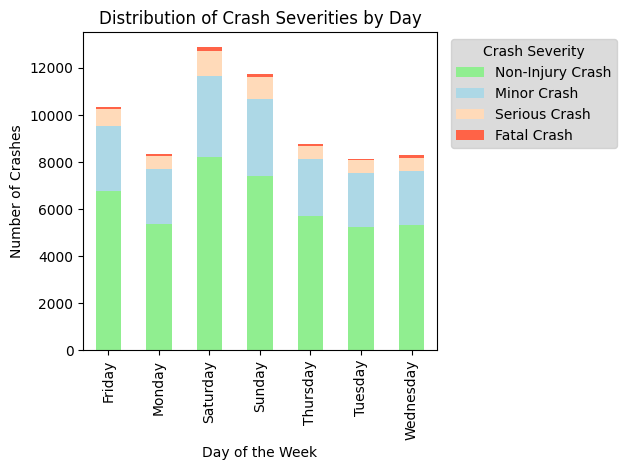

<Figure size 1200x600 with 0 Axes>

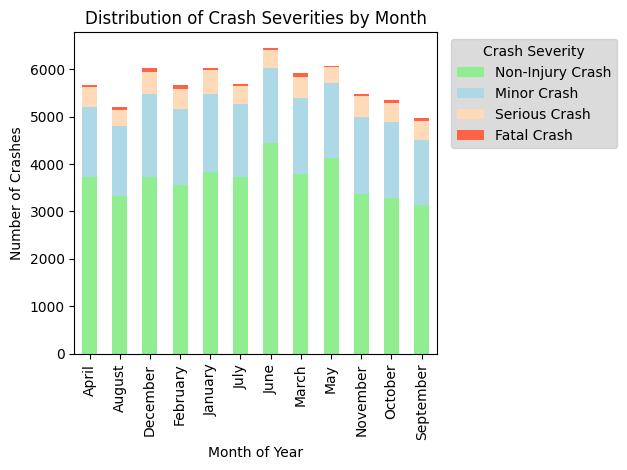

<Figure size 1200x600 with 0 Axes>

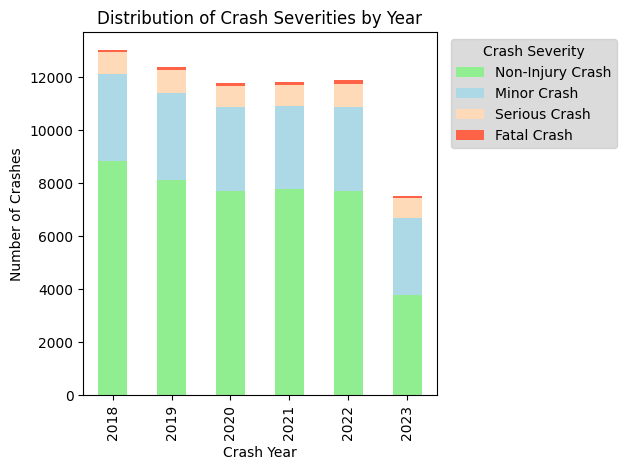

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

# Define the CSV file path in Google Drive
csv_file_path = '/content/drive/My Drive/Original data.csv'
# Define the chunk size and the CSV file path
chunksize = 1000  # Adjust the chunk size as needed

# Replace these with the actual column names for day, month, year, and crash severity in your dataset
day_column = 'Day of the week'
month_column = 'Month of year'
year_column = 'Crash year'
crash_severity_column = 'Crash severity'  # Replace with your actual crash severity column name

# Calculating counts for 'Day of the week'
day_counts = data.groupby([day_column, crash_severity_column]).size().unstack(fill_value=0)

# Calculating counts for 'Month of year'
month_counts = data.groupby([month_column, crash_severity_column]).size().unstack(fill_value=0)

# Calculating counts for 'Crash year'
year_counts = data.groupby([year_column, crash_severity_column]).size().unstack(fill_value=0)

# Define the order of the crash severities
severity_order = ['Non-Injury Crash', 'Minor Crash', 'Serious Crash', 'Fatal Crash']

# Lighter colors for the bars
colors = ['#90ee90', '#add8e6', '#ffdab9', '#ff6347']

# Plotting the distribution of crash severities by 'Day of the week'
plt.figure(figsize=(12, 6))
day_counts = day_counts[severity_order]  # Reorder columns
ax1 = day_counts.plot(kind='bar', stacked=True, color=colors)
plt.title('Distribution of Crash Severities by Day')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crashes')
legend1 = ax1.legend(title='Crash Severity', loc='upper left', bbox_to_anchor=(1.02, 1))
legend1.get_frame().set_facecolor('lightgray')
plt.tight_layout()
plt.show()

# Plotting the distribution of crash severities by 'Month of year'
plt.figure(figsize=(12, 6))
month_counts = month_counts[severity_order]  # Reorder columns
ax2 = month_counts.plot(kind='bar', stacked=True, color=colors)
plt.title('Distribution of Crash Severities by Month')
plt.xlabel('Month of Year')
plt.ylabel('Number of Crashes')
legend2 = ax2.legend(title='Crash Severity', loc='upper left', bbox_to_anchor=(1.02, 1))
legend2.get_frame().set_facecolor('lightgray')
plt.tight_layout()
plt.show()

# Plotting the distribution of crash severities by 'Crash year'
plt.figure(figsize=(12, 6))
year_counts = year_counts[severity_order]  # Reorder columns
ax3 = year_counts.plot(kind='bar', stacked=True, color=colors)
plt.title('Distribution of Crash Severities by Year')
plt.xlabel('Crash Year')
plt.ylabel('Number of Crashes')
legend3 = ax3.legend(title='Crash Severity', loc='upper left', bbox_to_anchor=(1.02, 1))
legend3.get_frame().set_facecolor('lightgray')
plt.tight_layout()
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


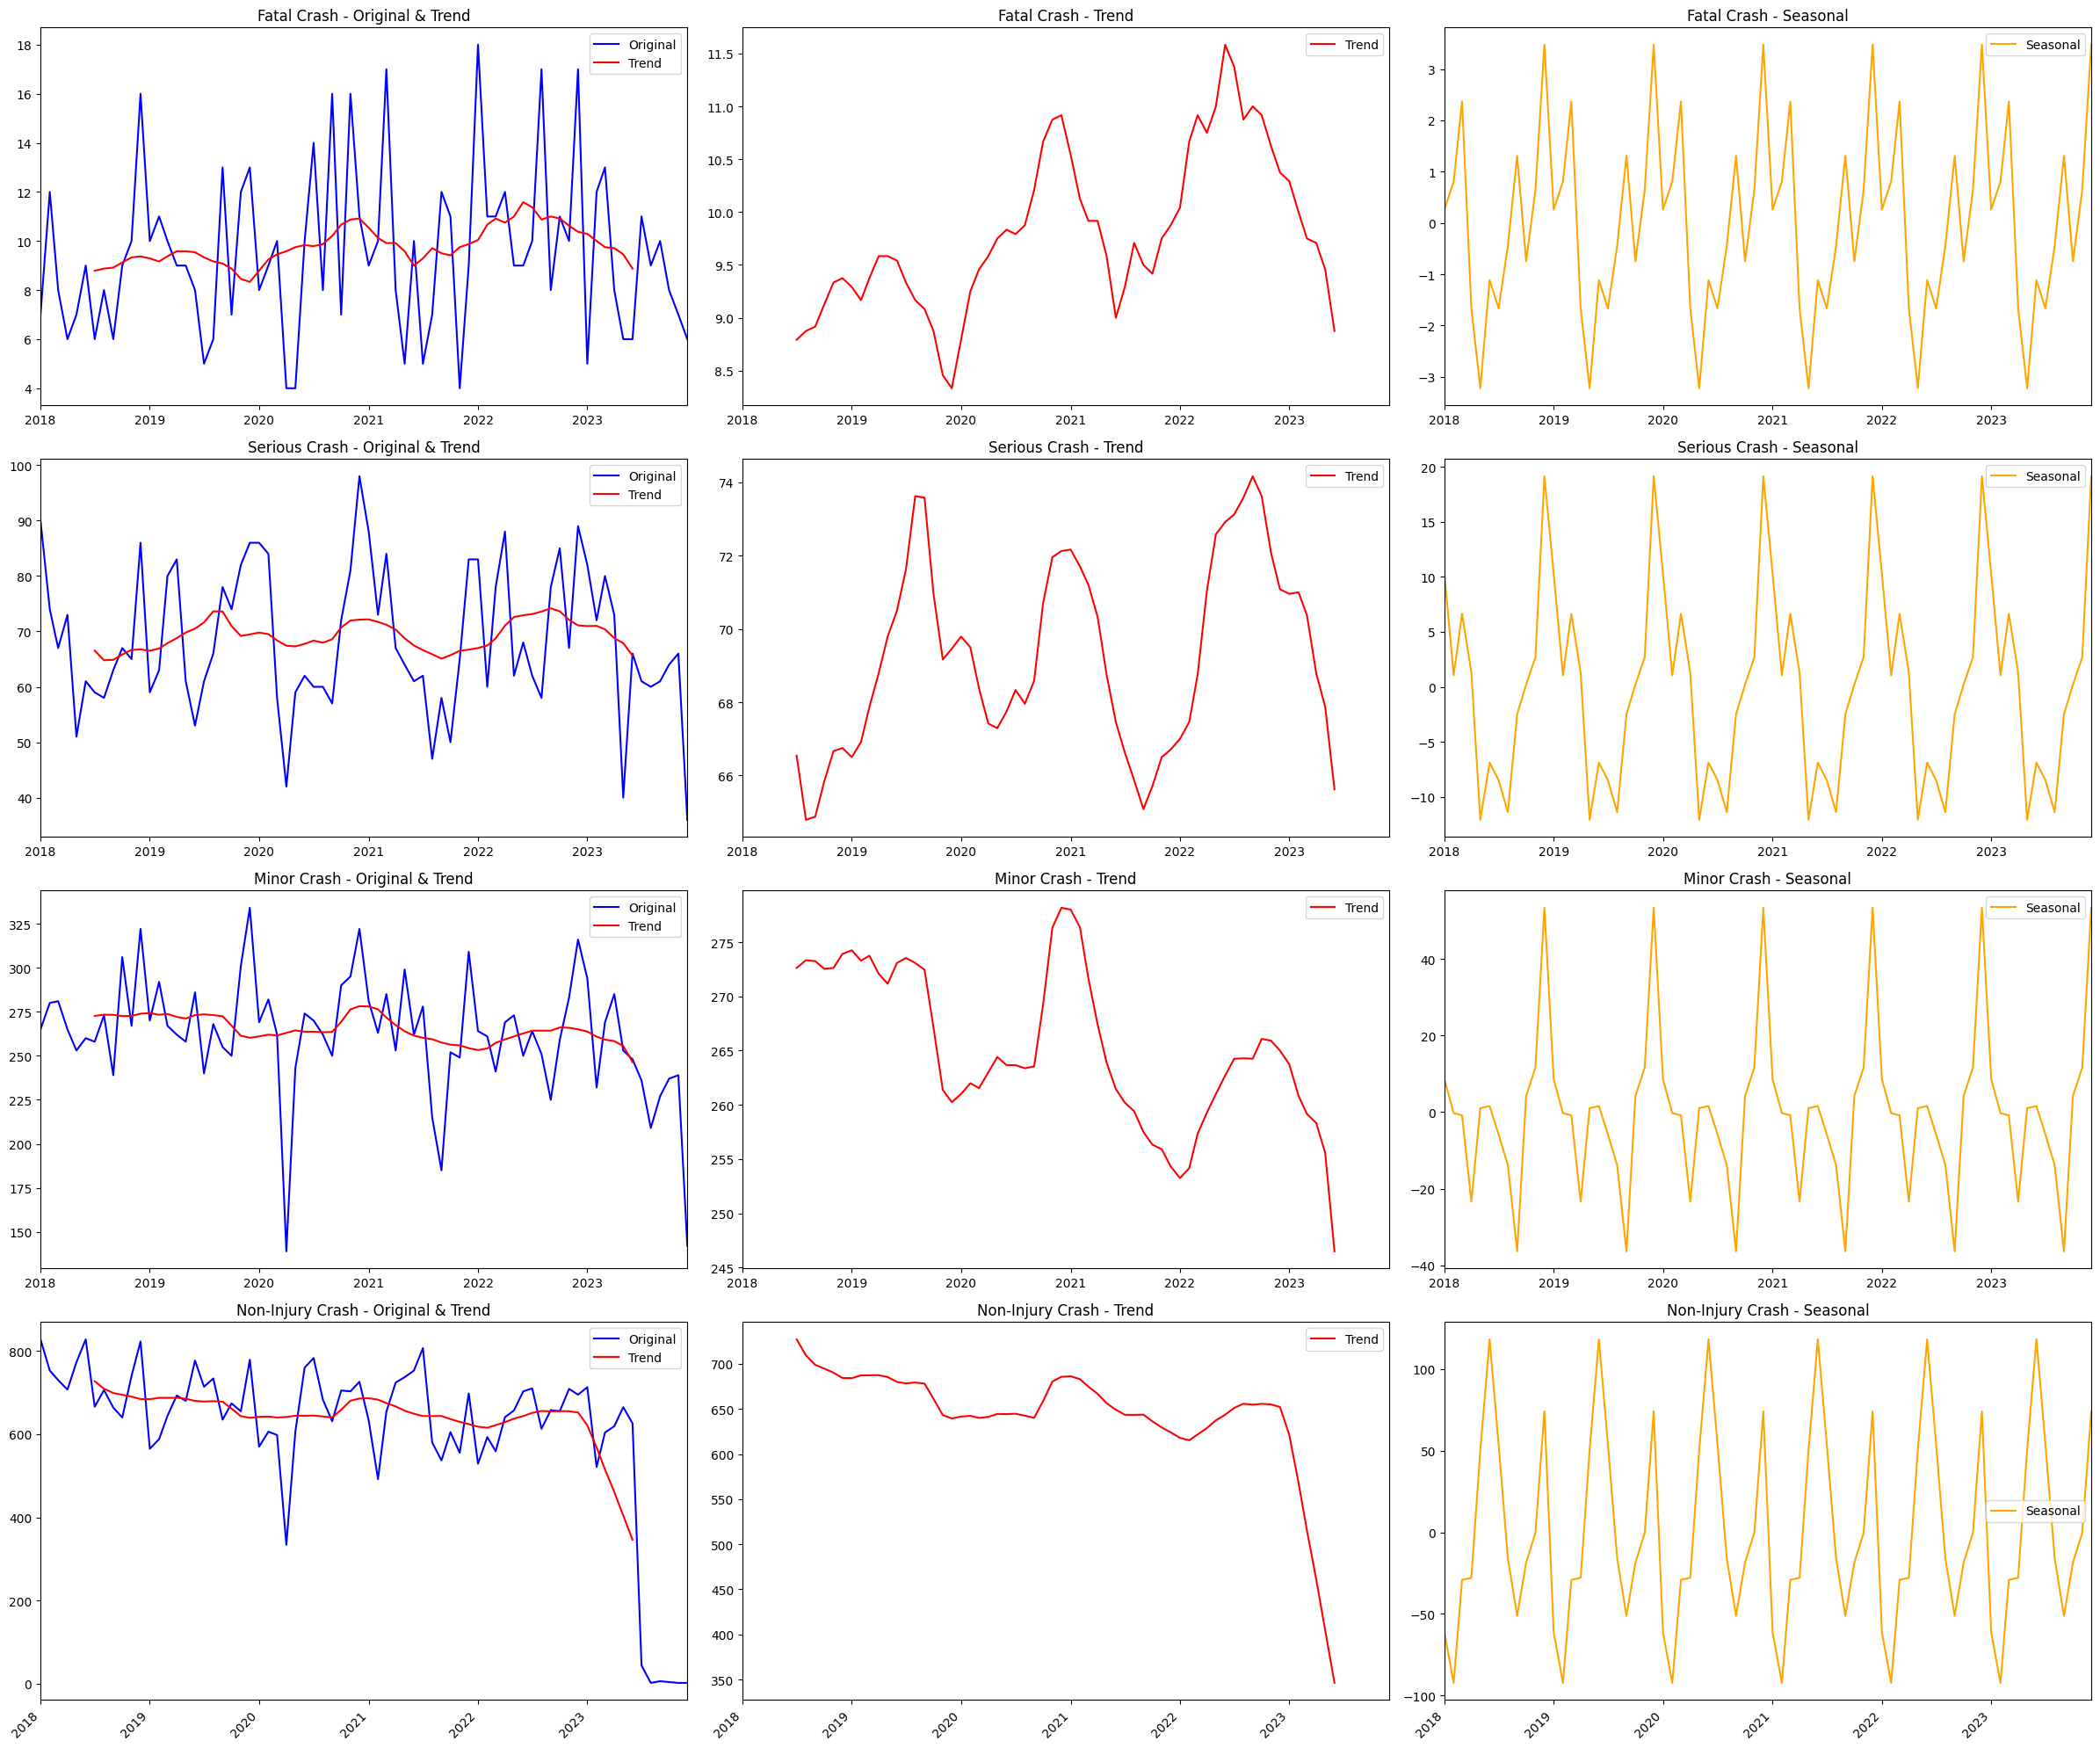

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose

from google.colab import drive
drive.mount('/content/drive')

# Define the CSV file path in Google Drive
csv_file_path = '/content/drive/My Drive/Original data.csv'
# Define the chunk size and the CSV file path
chunksize = 1000  # Adjust the chunk size as needed

# Ensure 'Crash date' is recognized as a date and set as index
data['Crash date'] = pd.to_datetime(data['Crash date'])
data.set_index('Crash date', inplace=True)

# Group the data by month and crash severity
severity_counts_by_month = data.groupby([data.index.to_period('M'), 'Crash severity']).size().unstack(fill_value=0)
severity_counts_by_month.index = severity_counts_by_month.index.to_timestamp()

# Perform seasonal decomposition
decomposition_results = {}
severity_types = ['Fatal Crash', 'Serious Crash', 'Minor Crash', 'Non-Injury Crash']
for severity in severity_types:
    if len(severity_counts_by_month[severity]) >= 24:
        decomposition_results[severity] = seasonal_decompose(severity_counts_by_month[severity],
                                                             model='additive',
                                                             period=12)

# Find the last valid date in the data
last_valid_date = decomposition_results['Fatal Crash'].observed.index[-1]

# Create the plots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(24, 20))

for i, severity in enumerate(severity_types):
    if severity in decomposition_results:
        observed_restricted = decomposition_results[severity].observed[:last_valid_date]
        trend_restricted = decomposition_results[severity].trend[:last_valid_date]
        seasonal_restricted = decomposition_results[severity].seasonal[:last_valid_date]

        axes[i, 0].plot(observed_restricted.index, observed_restricted, label='Original', color='blue')
        axes[i, 0].plot(trend_restricted.index, trend_restricted, label='Trend', color='red')
        axes[i, 0].set_title(f'{severity} - Original & Trend')
        axes[i, 0].legend()

        axes[i, 1].plot(trend_restricted.index, trend_restricted, label='Trend', color='red')
        axes[i, 1].set_title(f'{severity} - Trend')
        axes[i, 1].legend()

        axes[i, 2].plot(seasonal_restricted.index, seasonal_restricted, label='Seasonal', color='orange')
        axes[i, 2].set_title(f'{severity} - Seasonal')
        axes[i, 2].legend()

# Setting the x-axis range to exclude 2024
for ax_row in axes:
    for ax in ax_row:
        ax.set_xlim([decomposition_results['Fatal Crash'].observed.index[0], last_valid_date])
        ax.xaxis.set_major_locator(mdates.YearLocator(base=1))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate x-axis labels
for ax in axes[-1, :]:
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


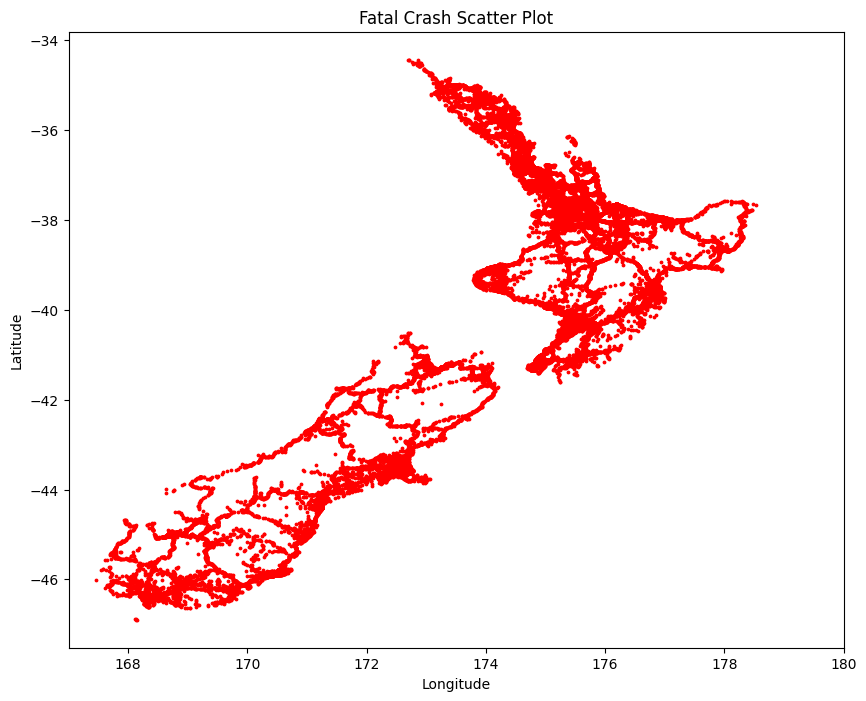

In [ ]:
import folium
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

# Define the CSV file path in Google Drive
csv_file_path = '/content/drive/My Drive/Original data.csv'
# Define the chunk size and the CSV file path
chunksize = 1000  # Adjust the chunk size as needed
data.dropna(subset=['Latitude', 'Longitude'], inplace=True)

# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(data['Longitude'], data['Latitude'], c='red', s=3)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Fatal Crash Scatter Plot')

# Set the x-axis limits
plt.xlim(167, 180)

# Display the plot
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


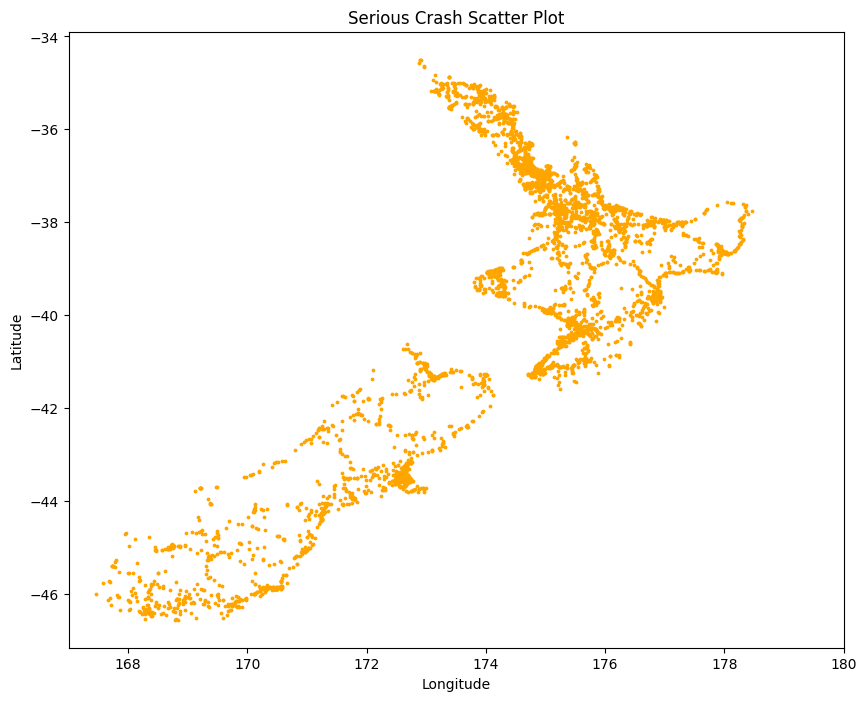

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

# Define the CSV file path in Google Drive
csv_file_path = '/content/drive/My Drive/Original data.csv'
# Define the chunk size and the CSV file path
chunksize = 1000  # Adjust the chunk size as needed
data.dropna(subset=['Latitude', 'Longitude', 'Crash severity'], inplace=True)

# Filter data by crash severity
serious_data = data[data['Crash severity'] == 'Serious Crash']

# Create a scatter plot for Serious Crash data in orange
plt.figure(figsize=(10, 8))
plt.scatter(serious_data['Longitude'], serious_data['Latitude'], c='orange', s=3)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Serious Crash Scatter Plot')
plt.xlim(167, 180)  # Adjust the x-axis limits as needed
plt.show()



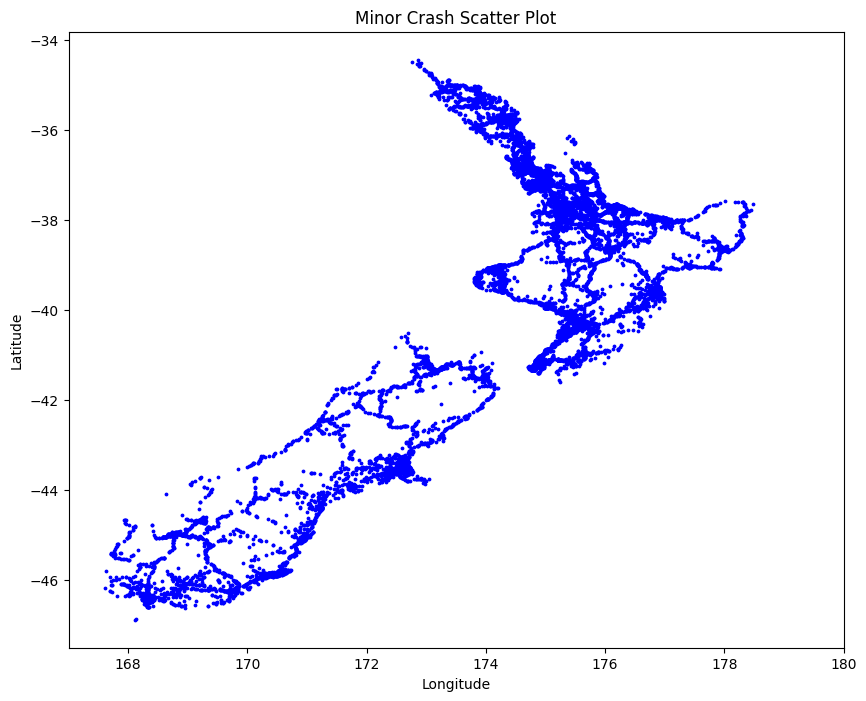

In [ ]:
# Filter data by crash severity
minor_data = data[data['Crash severity'] == 'Minor Crash']

# Create a scatter plot for Minor Crash data in blue
plt.figure(figsize=(10, 8))
plt.scatter(minor_data['Longitude'], minor_data['Latitude'], c='blue', s=3)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Minor Crash Scatter Plot')
plt.xlim(167, 180)  # Adjust the x-axis limits as needed
plt.show()


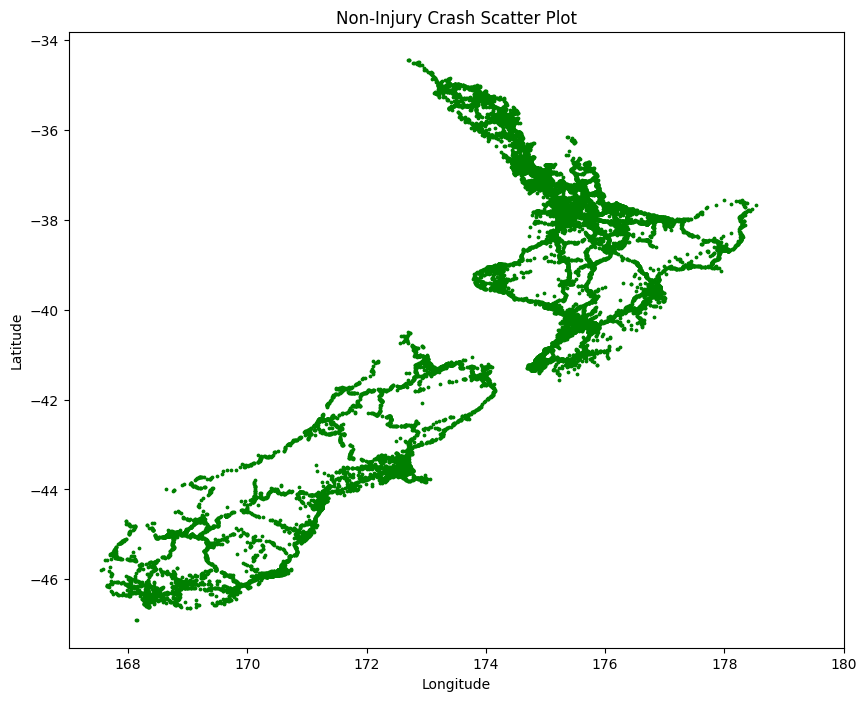

In [ ]:
# Filter data by crash severity
non_injury_data = data[data['Crash severity'] == 'Non-Injury Crash']

# Create a scatter plot for Non-Injury Crash data in green
plt.figure(figsize=(10, 8))
plt.scatter(non_injury_data['Longitude'], non_injury_data['Latitude'], c='green', s=3)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Non-Injury Crash Scatter Plot')
plt.xlim(167, 180)  # Adjust the x-axis limits as needed
plt.show()


In [ ]:
import pandas as pd


from google.colab import drive
drive.mount('/content/drive')

# Define the CSV file path in Google Drive
csv_file_path = '/content/drive/My Drive/Original data.csv'
# Define the chunk size and the CSV file path
chunksize = 1000  # Adjust the chunk size as needed


# Proceed only if 'data' is successfully loaded
if data is not None:
    # Check for duplicate rows
    duplicate_rows = data[data.duplicated(keep=False)]
    print("Duplicate Rows:")
    print(duplicate_rows)

    # Check for missing values in the entire DataFrame
    missing_values = data.isnull().sum()
    print("\nMissing Values in the DataFrame:")
    print(missing_values)
else:
    print("Failed to load data from CSV.")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Duplicate Rows:
Empty DataFrame
Columns: [codedcrashid, Crash identifier, Crash severity, Simple / complex crash, Number of road users outside a vehicle, Number of vehicles involved, Police attended, Fatal injury count, Serious injury count, Minor injury count, Non-injury count, Watch house, Social Cost, Crash year, Day of the week, Month of year, Crash time, Holiday, Is weekend, Three hour group, Four hour group, Financial year, TLA (Territorial local authority), Regional council, Police district, Police area, Police station, Locality/suburb, Geospatial road name, Alternative road name, Auckland sectors, NZTA network boundaries (NOC), Census area unit, NZTA Regions, RSR Peer groups, RSR Peer groups codes, Road category, Deprivation mesh block area unit population density, Deprivation mesh block deprivation index, One Network Road Classification (ONRC), AKL l

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

# Define the CSV file path in Google Drive
csv_file_path = '/content/drive/My Drive/Original data.csv'
# Define the chunk size and the CSV file path
chunksize = 1000  # Adjust the chunk size as needed
from google.colab import drive
drive.mount('/content/drive')

# Define the CSV file path in Google Drive
csv_file_path = '/content/drive/My Drive/Original data.csv'
# Define the chunk size and the CSV file path
chunksize = 1000  # Adjust the chunk size as needed
# Display the first few rows of the dataframe and its summary
data_info = data.info()
data_head = data.head()

data_info, data_head


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 68464 entries, 2018-01-10 to 2023-07-04
Columns: 102 entries, codedcrashid to Vehicle 4 contributing factor
dtypes: float64(17), int64(8), object(77)
memory usage: 53.8+ MB


(None,
             codedcrashid  Crash identifier Crash severity  \
 Crash date                                                  
 2018-01-10       1144502         201800010    Fatal Crash   
 2018-01-16       1144507         201800015    Fatal Crash   
 2018-02-18       1144546         201800054    Fatal Crash   
 2018-02-25       1144553         201800061    Fatal Crash   
 2018-03-03       1144578         201800089    Fatal Crash   
 
              Simple / complex crash  Number of road users outside a vehicle  \
 Crash date                                                                    
 2018-01-10  Multiple Party (Simple)                                     NaN   
 2018-01-16             Single Party                                     NaN   
 2018-02-18             Single Party                                     NaN   
 2018-02-25             Single Party                                     NaN   
 2018-03-03             Single Party                                     NaN 